# Predictive Analysis: Stroke Risk Prediction


- **Nama:** Ferry Pebriansyah
- **Email:** ferryfeb10@gmail.com
- **ID Dicoding:** ferrypebriansyah

# Domain Proyek

Stroke merupakan salah satu penyebab utama kematian dan kecacatan di Indonesia. Penyakit ini terjadi akibat gangguan aliran darah ke otak, yang menyebabkan kerusakan pada jaringan otak dan mengakibatkan gangguan fungsi tubuh, baik secara fisik, bicara, maupun kognitif. Dalam beberapa kasus, stroke bahkan dapat menyebabkan kematian secara tiba-tiba jika tidak segera mendapatkan penanganan.

Berdasarkan Data Riset Kesehatan Dasar (Riskesdas) 2018, prevalensi stroke di Indonesia mencapai 10,9 per 1.000 penduduk, dengan angka kejadian tertinggi terjadi di Provinsi Sulawesi Selatan. Angka ini mengalami peningkatan dibandingkan data sebelumnya pada tahun 2013 yang menunjukkan angka 7 per 1.000 penduduk. Hal ini menunjukkan bahwa stroke menjadi beban kesehatan yang makin besar bagi masyarakat Indonesia.

Faktor-faktor risiko utama seperti hipertensi, diabetes, merokok, obesitas, serta kurangnya aktivitas fisik menjadi pemicu utama meningkatnya angka kejadian stroke. Selain itu, tingkat edukasi masyarakat mengenai gejala awal stroke dan pentingnya pencegahan masih tergolong rendah, sehingga banyak kasus baru ditemukan saat sudah parah.

Oleh karena itu, pemahaman tentang faktor-faktor risiko yang memengaruhi stroke sangat penting sebagai langkah awal dalam upaya pencegahan dan pengendalian. Peningkatan kesadaran masyarakat dan dukungan sistem layanan kesehatan menjadi kunci utama dalam menekan angka kejadian stroke di Indonesia.

**Referensi**:

- Badan Penelitian dan Pengembangan Kesehatan. (2018). Laporan Nasional Riskesdas 2018. Kementerian Kesehatan RI.

- Kementerian Kesehatan RI. (2020). Situasi dan Analisis Lanjut Penyakit Stroke. Pusat Data dan Informasi Kemenkes RI.

# Business Understanding


## Problem Statements



1.   Faktor-faktor apa saja yang paling berkontribusi terhadap risiko seseorang mengalami stroke?
2.    Bagaimana model Machine Learning dapat memprediksi apakah seseorang berpotensi terkena stroke berdasarkan kondisi yang mereka input?




## GOALS

1. Mengidentifikasi faktor-faktor utama yang berkontribusi terhadap risiko seseorang mengalami stroke, berdasarkan atribut seperti usia dan berbagai gejala klinis (contoh: nyeri dada, sesak napas, detak jantung tidak teratur, dan lainnya).
2. Mengetahui bagaimana cara model Machine Learning dapat memprediksi apakah seseorang berpotensi terkena stroke berdasarkan kondisi yang mereka input


## Solution Statements

Untuk menjawab permasalahan yang telah dirumuskan, solusi yang diusulkan dalam proyek ini adalah melakukan analisis data berdasarkan riwayat kesehatan dan gejala yang dialami pasien. Langkah-langkah utama dalam solusi ini meliputi:

1. Eksplorasi data (Exploratory Data Analysis) untuk memahami distribusi variabel, mendeteksi pola-pola penting, dan mengidentifikasi hubungan awal antara gejala, kondisi kesehatan, serta faktor risiko dengan kemungkinan terjadinya stroke.

2. Menguji model Machine Learning yang mampu memprediksi risiko stroke seseorang secara akurat berdasarkan data input kondisi kesehatan (seperti tekanan darah, detak jantung, gejala nyeri dada, gaya hidup, dan faktor risiko lainnya), guna membantu deteksi dini dan pengambilan keputusan medis yang lebih cepat dan tepat.




# Data Understanding


Tahap ini merupakan proses analisis data yang bertujuan untuk memperoleh pemahaman yang menyeluruh mengenai dataset sebelum melanjutkan ke tahap analisis lebih lanjut.

## Mengimport Library

In [1]:
!pip install kaggle

In [2]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.1 MB/s eta 0:00:00


In [3]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [4]:
import os
import shutil
import textwrap
import numpy as np
import zipfile
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

## Data Loading

In [5]:
#!/bin/bash
!curl -L -o stroke-prediction.zip\
  "https://www.kaggle.com/api/v1/datasets/download/mahatiratusher/stroke-risk-prediction-dataset"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  454k  100  454k    0     0   747k      0 --:--:-- --:--:-- --:--:--  747k


In [6]:
#membuka zip menjadi folder
with zipfile.ZipFile("/content/stroke-prediction.zip", "r") as zip_ref:
    zip_ref.extractall("stroke-prediction")

#membaca csv dalam folder
data = pd.read_csv("/content/stroke-prediction/stroke_risk_dataset.csv")

# Display the first few rows
data

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,18,30.0,0
69996,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,24,33.0,0
69997,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,49,45.5,0
69998,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,45,48.5,0


**Insight**:
Dataset ini terdiri dari 70000 data dan 18 kolom.



### Deskripsi Variable

 **Deskripsi Variabel Dataset Stroke Risk Prediction**

| Variabel                     | Tipe Data  | Deskripsi                                                  |
|------------------------------|------------|------------------------------------------------------------|
| Chest Pain                   | int64     | Adanya rasa nyeri dada (1 = ya, 0 = tidak)                 |
| Shortness of Breath          | int64     | Mengalami sesak napas (1 = ya, 0 = tidak)                  |
| Irregular Heartbeat          | int64     | Irama jantung tidak teratur (1 = ya, 0 = tidak)            |
| Fatigue & Weakness           | int64     | Merasa lelah dan lemah (1 = ya, 0 = tidak)                 |
| Dizziness                   | int64     | Merasa pusing atau kepala berputar (1 = ya, 0 = tidak)     |
| Swelling (Edema)            | int64     | Pembengkakan pada tubuh (1 = ya, 0 = tidak)                 |
| Pain in Neck/Jaw/Shoulder/Back | int64  | Nyeri pada leher, rahang, bahu, atau punggung (1 = ya, 0 = tidak) |
| Excessive Sweating          | int64     | Berkeringat berlebihan (1 = ya, 0 = tidak)                  |
| Persistent Cough            | int64     | Batuk terus menerus (1 = ya, 0 = tidak)                     |
| Nausea/Vomiting             | int64     | Mual atau muntah (1 = ya, 0 = tidak)                        |
| High Blood Pressure         | int64     | Tekanan darah tinggi (1 = ya, 0 = tidak)                    |
| Chest Discomfort (Activity) | int64     | Ketidaknyamanan dada saat aktivitas (1 = ya, 0 = tidak)    |
| Cold Hands/Feet             | int64     | Tangan atau kaki terasa dingin (1 = ya, 0 = tidak)          |
| Snoring/Sleep Apnea         | int64     | Mendengkur atau apnea tidur (1 = ya, 0 = tidak)             |
| Anxiety/Feeling of Doom     | int64     | Merasa cemas atau takut (1 = ya, 0 = tidak)                 |
| Age                         | int64     | Umur pada pasien/responden                                  |
| Stroke Risk (%)             | Float      | Estimasi probabilitas terjadinya stroke dalam persen (0 - 100%) |
| At Risk                     | int64     | Status risiko stroke (1 = berisiko, 0 = tidak)              |



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

**Insight:** Dataset ini terdiri dari 16 tipedata int64, dan 1 tipedata float64.


In [8]:
data.shape

(70000, 18)

In [9]:
# Membuat dataframe baru
df_filtered = pd.DataFrame(data)

### Deskripsi Statistik dari Data

In [10]:
# Memanggil untuk statistik data mengecek outlier.
df_filtered.describe()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


<!-- **insight:**

1. Distribusi Usia Pasien
- Rata-rata usia pasien adalah 43 tahun, dengan rentang dari 0.08 tahun (~1 bulan) hingga 82 tahun.

- Dataset menunjukan bahwa mencakup pasien dari berbagai kelompok usia, dari bayi hingga lanjut usia.

- 75% pasien berusia di bawah 61 tahun, menandakan distribusi yang condong ke kelompok usia produktif.

2. Hipertensi dan Penyakit Jantung
- Sekitar 9.7% dari pasien memiliki hipertensi dan sekitar 5.4% memiliki penyakit jantung.


3. Rata-Rata Glukosa Darah
- Rata-rata kadar glukosa dalam darah adalah 106.1 mg/dL, dengan nilai maksimum mencapai 271.7 mg/dL.

- Hal ini menunjukkan adanya individu dengan kemungkinan kondisi hiperglikemia, yang dapat meningkatkan risiko stroke.

4. Indeks Massa Tubuh (BMI)
- Rata-rata BMI adalah 28.9, yang tergolong overweight berdasarkan klasifikasi WHO (25–29.9).

- Nilai maksimum BMI adalah 97.6, yang tergolong obesitas ekstrem, menandakan potensi risiko kesehatan tinggi pada sebagian kecil populasi.

5. Kejadian Stroke
- Hanya sekitar 4.9% dari pasien dalam dataset yang pernah mengalami stroke.

- Ini menunjukkan ketidakseimbangan kelas (class imbalance) yang signifikan antara pasien stroke dan non-stroke, yang perlu diperhatikan dalam analisis prediktif.

**Perlu diingat:**
- Setiap baris data dalam dataset mewakili seorang pasien yang diperiksa, tidak berarti pasien tersebut pasti mengalami stroke.

- Nilai kolom stroke adalah indikator apakah pasien pernah mengalami stroke (1) atau tidak (0).

- Pasien dengan usia sangat muda, seperti bayi, bisa ada dalam dataset, namun belum tentu mengalami stroke. -->


## EDA - Univariate Analysis


### Numerical Features


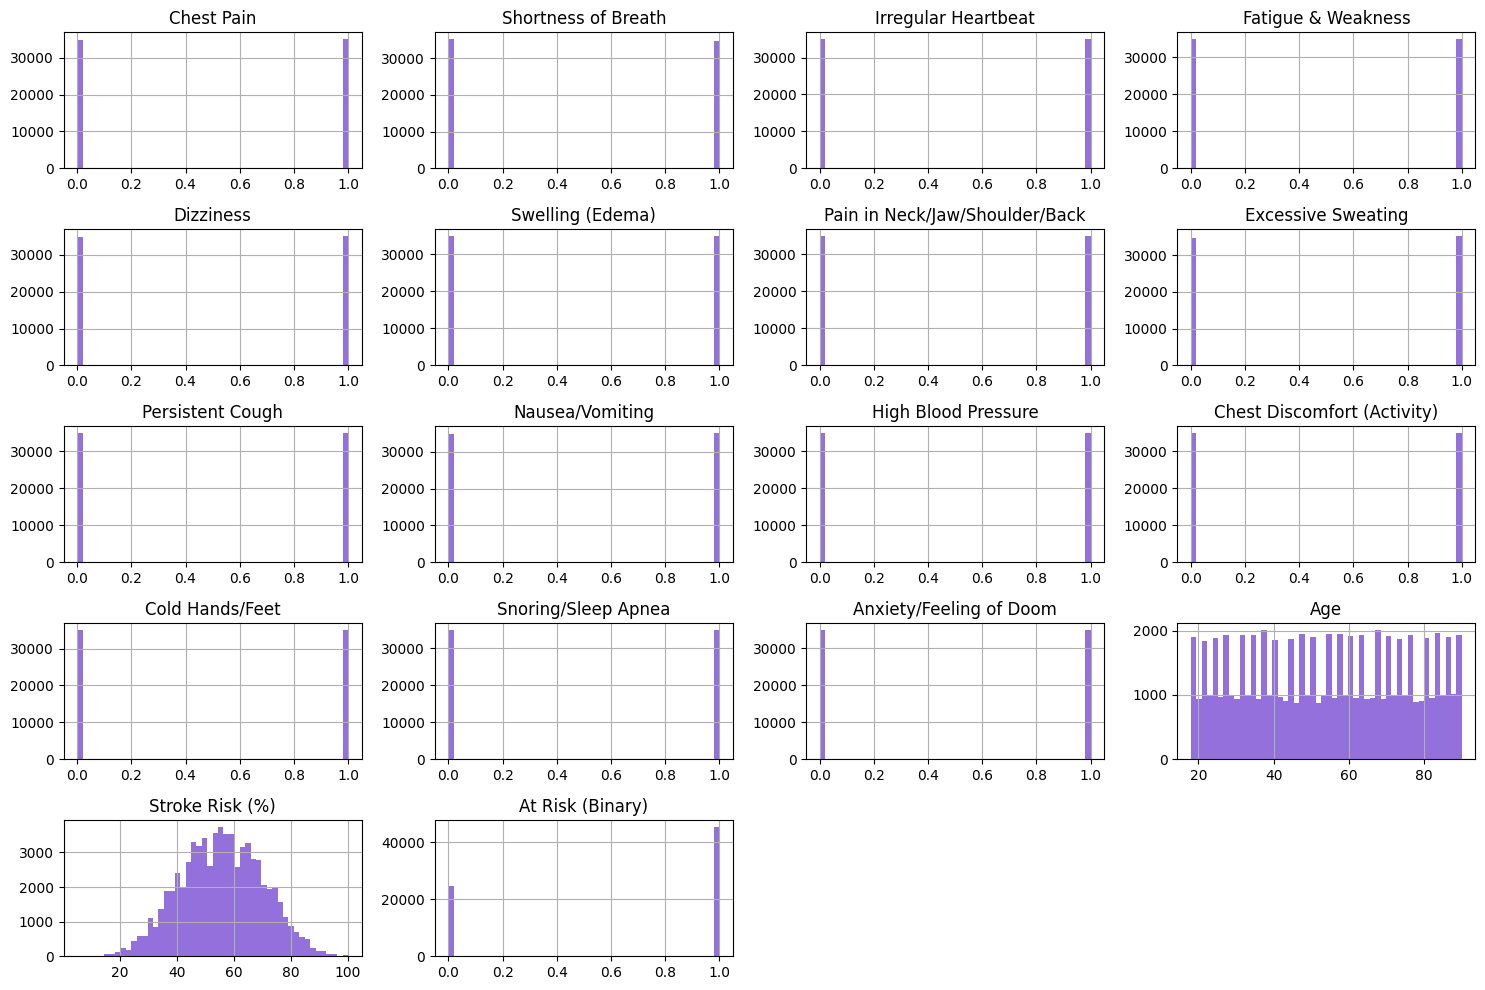

In [11]:
df_filtered.hist(bins=50, figsize=(15,10), color= 'mediumpurple')

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

#menampilkan plot
plt.show()

## EDA - Multivariate Analysis

### Membandingkan hubungan **usia** dan risiko stroke

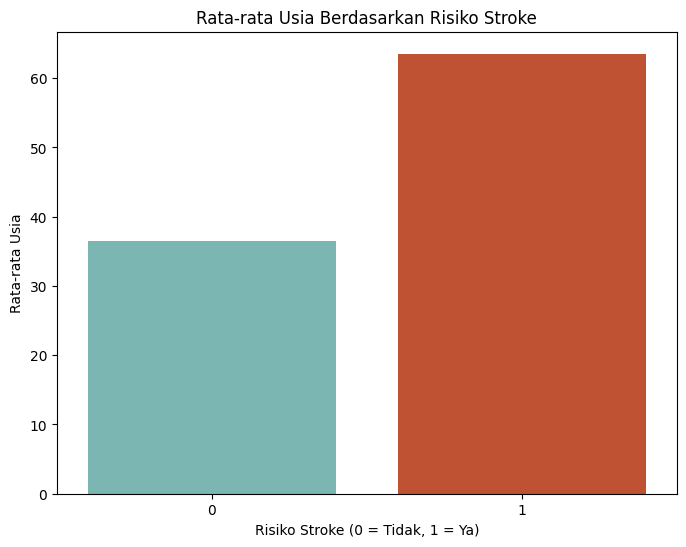

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(
    x='At Risk (Binary)',
    y='Age',
    hue='At Risk (Binary)',
    data=df_filtered,
    palette=['#71C0BB', '#D5451B'],  # Biru pastel & cokelat pastel
    errorbar=None,
    legend=False
)
plt.title('Rata-rata Usia Berdasarkan Risiko Stroke')
plt.xlabel('Risiko Stroke (0 = Tidak, 1 = Ya)')
plt.ylabel('Rata-rata Usia')
plt.show()


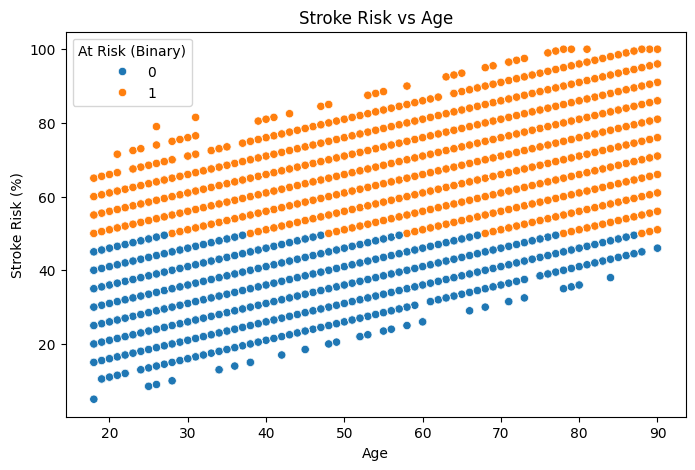

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_filtered['Age'], y=df_filtered['Stroke Risk (%)'], hue=df_filtered['At Risk (Binary)'])
plt.title('Stroke Risk vs Age')
plt.xlabel('Age')
plt.ylabel('Stroke Risk (%)')
plt.show()

**insight:**
Pasien yang mengalami stroke memiliki rata-rata usia jauh lebih tinggi dibandingkan yang tidak mengalami stroke. Rata-rata usia penderita stroke berada di atas 60 tahun. Sementara itu, rata-rata usia pasien yang tidak mengalami stroke berada di bawah 40 tahun.



### Hubungan Gejala dengan Risiko Stroke

Text(0.5, 1.0, 'Correlation Matrix')

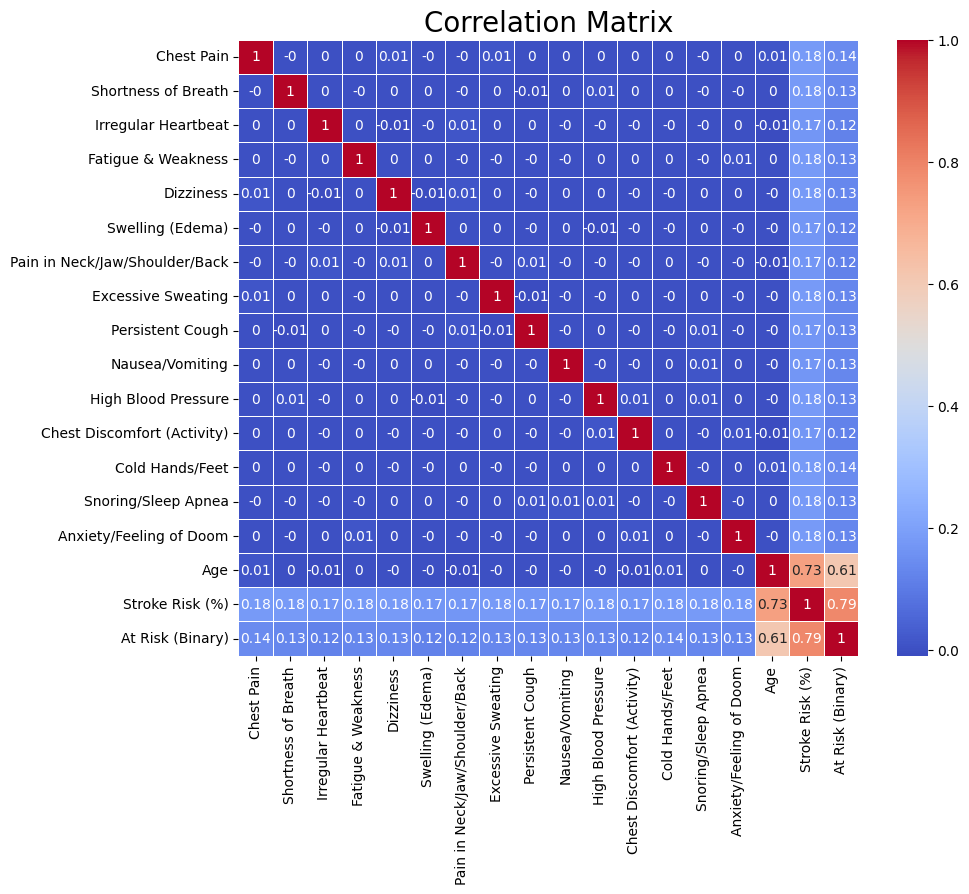

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_filtered.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix", size=20)

**insight**: Usia dan tekanan darah tinggi merupakan faktor risiko yang cukup kuat terhadap stroke. Gejala seperti sesak napas, kelelahan, detak jantung tidak teratur, dan nyeri dada juga ikut berkontribusi, meskipun dalam tingkat korelasi yang lebih lemah.

## Data Quality Verification

### Memeriksa Data Duplikat

In [15]:
df_filtered.duplicated().sum()

np.int64(1021)

In [16]:
# Menampilkan data duplikat
df_filtered[df_filtered.duplicated]

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
1519,0,1,1,1,1,1,1,0,0,1,1,0,0,1,0,77,74.5,1
1594,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,41,51.5,1
3483,0,0,1,0,1,1,0,0,1,1,0,1,1,0,1,59,60.5,1
3655,0,0,0,1,1,0,0,0,0,1,1,1,1,1,1,56,59.0,1
3912,0,1,1,0,0,0,1,0,0,1,1,0,1,1,0,66,59.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69854,0,1,1,1,1,0,0,0,0,0,1,0,0,1,1,26,39.0,0
69877,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,64,73.0,1
69888,0,0,1,1,0,1,0,1,0,1,1,1,0,1,1,79,75.5,1
69940,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,71,61.5,1


**Insight:** Terdapat 1021 data duplikat

### Memeriksa Missing Value

In [17]:
df_filtered.isnull().sum()

,0
Chest Pain,0
Shortness of Breath,0
Irregular Heartbeat,0
Fatigue & Weakness,0
Dizziness,0
Swelling (Edema),0
Pain in Neck/Jaw/Shoulder/Back,0
Excessive Sweating,0
Persistent Cough,0
Nausea/Vomiting,0


**Insight**: Tidak ditemukan missing value pada dataframe diatas

### Memeriksa Outlier

In [18]:
# Melakukan analisis statistik data setelah dihapus data duplikat dan missing value.
df_filtered.describe()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


In [19]:
binning_feature = [
    'Chest Pain',
    'Shortness of Breath',
    'Irregular Heartbeat',
    'Fatigue & Weakness',
    'Dizziness',
    'Swelling (Edema)',
    'Pain in Neck/Jaw/Shoulder/Back',
    'Excessive Sweating',
    'Persistent Cough',
    'Nausea/Vomiting',
    'High Blood Pressure',
    'Chest Discomfort (Activity)',
    'Cold Hands/Feet',
    'Snoring/Sleep Apnea',
    'Anxiety/Feeling of Doom'
]


In [20]:
#Cek data outlier

selected_cols = df_filtered[binning_feature]

Q1 = selected_cols.quantile(0.25)
Q3 = selected_cols.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df_filtered[~((selected_cols < (Q1 - 1.5 * IQR)) | (selected_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

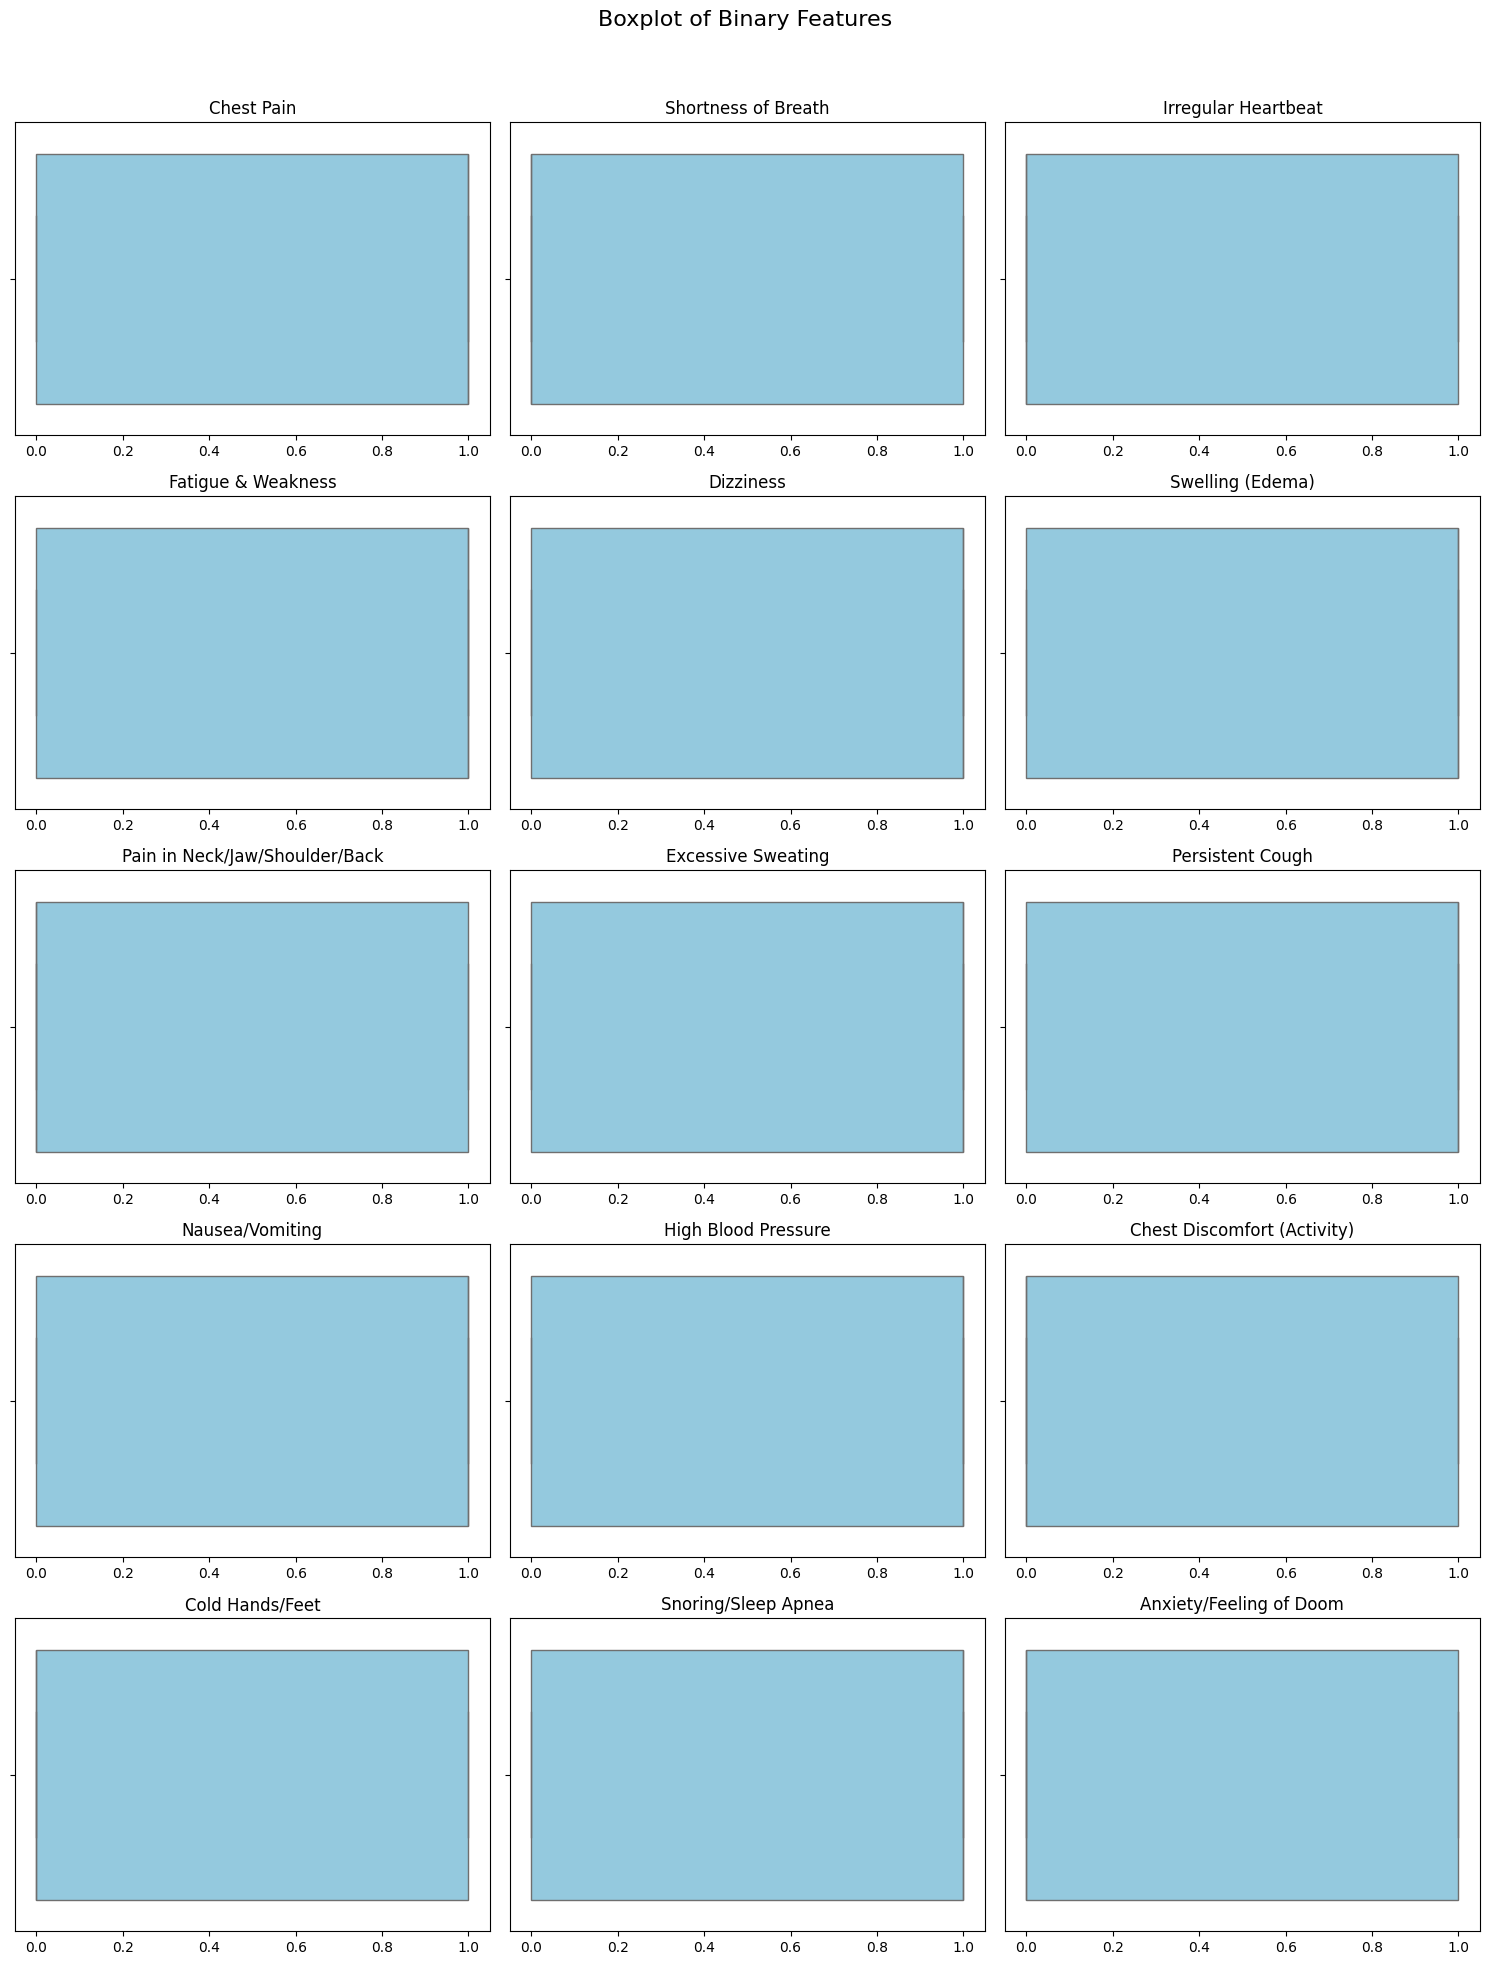

In [21]:
# Jumlah fitur
n_features = len(binning_feature)

# Hitung ukuran grid (misalnya 4 kolom, sisanya baris)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

# Buat grid dinamis sesuai jumlah fitur
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))
fig.suptitle('Boxplot of Binary Features', fontsize=16)

# Flatten axes supaya bisa di-loop
axes = axes.flatten()

# Loop fitur dan plot
for i, feature in enumerate(binning_feature):
    sns.boxplot(data=df_filtered, x=feature, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('')

# Sembunyikan subplot yang tidak dipakai
for j in range(len(binning_feature), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Insight**: Fitur-fitur biner contohnya seperti Chest Pain, Shortness of Breath, dan Irregular Heartbeat tidak memiliki outlier, karena memang hanya memiliki dua nilai yang valid (0 dan 1). Oleh karena itu, tidak perlu dilakukan deteksi atau penanganan outlier untuk fitur-fitur ini.

# Data Preparation

## Data Cleaning

### Menangani Duplikasi Data

In [22]:
# Menghapus data duplikat
df_cleaned = df_filtered.drop_duplicates()

In [23]:
df_cleaned.shape

(68979, 18)

## Split Train dan Test dataframe


In [24]:
from sklearn.model_selection import train_test_split
# Fitur dan target
X = df_cleaned.drop(columns=['At Risk (Binary)', 'Stroke Risk (%)'])
y = df_cleaned['At Risk (Binary)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Menampilkan ukuran data training dan testing dari X dan y
print("Ukuran X_train: ", X_train.shape)
print("Ukuran X_test: ", X_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran X_train:  (55183, 16)
Ukuran X_test:  (13796, 16)
Ukuran y_train:  (55183,)
Ukuran y_test:  (13796,)


In [26]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 68979
Total # of sample in train dataset: 55183
Total # of sample in test dataset: 13796


## Standarisasi

In [27]:
from sklearn.preprocessing import StandardScaler
# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling


In [28]:
def make_evaluation(y_true, y_pred, title, target_names=None):
    if target_names is None:
        target_names = ['0', '1']

    # Gunakan label string sesuai target_names
    labels = target_names

    # Classification report pakai target_names (label string)
    print(classification_report(y_true, y_pred, target_names=target_names))

    # Plot confusion matrix dengan labels string
    fig, ax = plt.subplots(figsize=(10, 5))
    disp = ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, ax=ax, display_labels=target_names
)


    ax.set_xticklabels(target_names, rotation=90)
    ax.set_yticklabels(target_names)

    ax.grid(False)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

## 1. XGBoost

In [29]:
import pandas as pd
import optuna
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Pastikan data dalam bentuk numpy array
X_train_scaled = X_train_scaled.values if isinstance(X_train_scaled, pd.DataFrame) else X_train_scaled
X_test_scaled = X_test_scaled.values if isinstance(X_test_scaled, pd.DataFrame) else X_test_scaled

# Tentukan jumlah kelas (karena klasifikasi biner, hanya 2 kelas)
num_class = 2

# Fungsi objective untuk Optuna
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 15)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
    random_state = 42

    model_xgb = XGBClassifier(
        max_depth=max_depth,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=random_state,
        n_jobs=-1,
        eval_metric='logloss',
        objective='binary:logistic'
    )

    model_xgb.fit(X_train_scaled, y_train)
    y_pred = model_xgb.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Jalankan optimasi Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Tampilkan hasil terbaik
print("Best hyperparameters: ", study.best_params)
print("Best accuracy: ", study.best_value)

[I 2025-05-25 05:34:22,290] A new study created in memory with name: no-name-24076fe3-6a9e-4a31-ad8f-a6c08d0155e5
[I 2025-05-25 05:34:27,828] Trial 0 finished with value: 0.9344012757320963 and parameters: {'max_depth': 14, 'n_estimators': 162, 'learning_rate': 0.0114238402802174}. Best is trial 0 with value: 0.9344012757320963.
[I 2025-05-25 05:34:32,042] Trial 1 finished with value: 0.9014931864308495 and parameters: {'max_depth': 11, 'n_estimators': 159, 'learning_rate': 0.004546925883989093}. Best is trial 0 with value: 0.9344012757320963.
[I 2025-05-25 05:34:37,096] Trial 2 finished with value: 0.6492461583067556 and parameters: {'max_depth': 15, 'n_estimators': 187, 'learning_rate': 0.0005703941260775272}. Best is trial 0 with value: 0.9344012757320963.
[I 2025-05-25 05:34:38,442] Trial 3 finished with value: 0.9357060017396347 and parameters: {'max_depth': 13, 'n_estimators': 52, 'learning_rate': 0.03530220008783004}. Best is trial 3 with value: 0.9357060017396347.
[I 2025-05-25

Best hyperparameters:  {'max_depth': 13, 'n_estimators': 52, 'learning_rate': 0.03530220008783004}
Best accuracy:  0.9357060017396347


In [30]:
# Melatih model akhir dengan parameter terbaik
model_xgb = XGBClassifier(
    max_depth=13,
    n_estimators=52,
    learning_rate=0.03530220008783004,
    random_state=9,
    n_jobs=-1,
    objective='binary:logistic'
)

model_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03530220008783004,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=52, n_jobs=-1,
              num_parallel_tree=None, random_state=9, ...)

**Insight:**

Berdasarkan proses pelatihan dan tuning menggunakan Optuna, diperoleh model XGBoost dengan performa sangat baik dalam memprediksi risiko stroke berdasarkan gejala. Proses hyperparameter tuning berhasil menemukan kombinasi terbaik yaitu:

- `max_depth=13` → Model dapat menangkap pola yang cukup kompleks, namun perlu diperhatikan potensi overfitting.

- `n_estimators=52` → Jumlah pohon yang tergolong sedikit, menunjukkan model sudah efektif belajar tanpa perlu banyak iterasi.

- `learning_rate=0.035` → Learning rate yang kecil membuat proses pembelajaran lebih lambat tapi lebih stabil, sehingga membantu mengurangi risiko overfitting.

- `objective='binary:logistic'` → Sesuai untuk tugas klasifikasi biner, seperti prediksi stroke (0 = Tidak Stroke, 1 = Stroke).

- `random_state=9` → Memastikan hasil eksperimen dapat direplikasi dengan konsisten.

**Kesimpulan**

Dengan parameter tersebut, model mampu mencapai akurasi sebesar 93.57%, yang menunjukkan bahwa model sangat efektif dalam mengklasifikasikan apakah seseorang berisiko stroke atau tidak.

Hasil akurasi model XGBoost: 93.57 %
              precision    recall  f1-score   support

Tidak Stroke       0.94      0.88      0.91      4839
      Stroke       0.94      0.97      0.95      8957

    accuracy                           0.94     13796
   macro avg       0.94      0.92      0.93     13796
weighted avg       0.94      0.94      0.94     13796



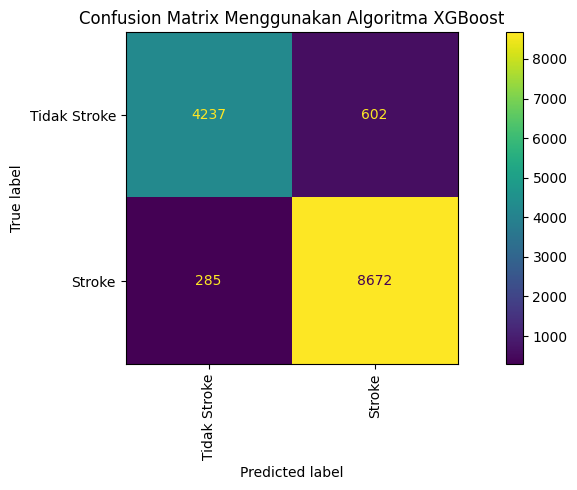

In [31]:
pred_xgb = model_xgb.predict(X_test_scaled)

# Evaluasi
accuracy_xgboost = round(accuracy_score(y_test, pred_xgb)*100, 2)
print("Hasil akurasi model XGBoost:", accuracy_xgboost, "%")

# Panggil evaluasi (label sudah 0 dan 1, target_names manual)
make_evaluation(y_test, pred_xgb, "Confusion Matrix Menggunakan Algoritma XGBoost", target_names=["Tidak Stroke", "Stroke"])

**Insight**:

- True Negatives (TN): 8672 — model dengan benar mengenali orang yang tidak berisiko stroke.

- True Positives (TP): 4237 — model dengan benar mengenali orang yang berisiko stroke.

- False Negatives (FN): 285 — orang yang seharusnya berisiko stroke tapi model tidak mengenalinya → ini paling krusial karena bisa fatal.

- False Positives (FP): 602 — orang yang tidak berisiko stroke tapi dikira berisiko → lebih dapat diterima dibanding FN

## 2. Random Forest

In [32]:
# Memanggil fungsi RandomForestClassifier dari library sklearn
model_rf = RandomForestClassifier(
    n_estimators=100,
    criterion="entropy",
    max_depth=10,
    random_state=50
)

# Melatih model Random Forest dengan data training pada X dan y
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=50)

- Model Random Forest diatur untuk membangun 100 pohon keputusan secara paralel, sehingga meningkatkan stabilitas dan akurasi model karena prediksi akhir diperoleh dari hasil voting banyak pohon.

- Kriteria pemisahan yang digunakan adalah "entropy", yaitu berdasarkan perhitungan informasi (information gain). Ini berarti setiap pohon akan mencari cara membagi data yang paling mengurangi ketidakpastian, sehingga hasil klasifikasinya menjadi lebih informatif.

- Parameter max_depth=10 membatasi kedalaman maksimum setiap pohon agar tidak terlalu kompleks. Tujuannya adalah untuk mencegah overfitting, yaitu kondisi di mana model terlalu menyesuaikan diri pada data training dan gagal bekerja baik pada data baru.

- Dengan mengatur random_state=50, proses pelatihan menjadi konsisten dan dapat direproduksi karena pemilihan sampel acak akan selalu menggunakan acuan (seed) yang sama.

- Terakhir, jika digunakan, parameter n_jobs=-1 akan memanfaatkan seluruh inti CPU yang tersedia untuk mempercepat proses pelatihan, terutama saat menangani dataset berukuran besar.

In [33]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_rf = model_rf.predict(X_test_scaled)

# Menampilkan akurasi model
accuracy_rf= round(accuracy_score(y_test, pred_rf)*100,2)
print("hasil akurasi model Random Forest: ", accuracy_rf,"%")

hasil akurasi model Random Forest:  91.97 %


In [34]:
print(set(type(x) for x in y_test))     # Set tipe data di y_test
print(set(type(x) for x in pred_rf))    # Set tipe data di pred_rf

print(y_test[:10])   # Contoh 10 elemen pertama y_test
print(pred_rf[:10])  # Contoh 10 elemen pertama pred_rf

{<class 'int'>}
{<class 'numpy.int64'>}
45307    0
30934    0
5577     0
25788    0
20988    1
49253    1
15807    1
16146    0
42361    1
59437    0
Name: At Risk (Binary), dtype: int64
[1 0 0 0 1 1 1 0 1 0]


              precision    recall  f1-score   support

           0       0.91      0.86      0.88      4839
           1       0.93      0.95      0.94      8957

    accuracy                           0.92     13796
   macro avg       0.92      0.91      0.91     13796
weighted avg       0.92      0.92      0.92     13796



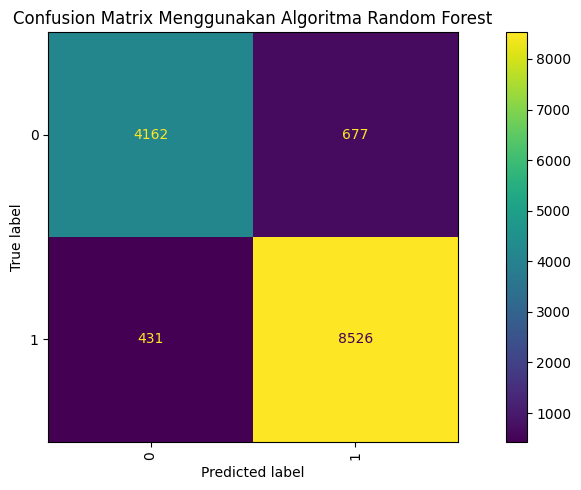

In [35]:
make_evaluation(y_test, pred_rf, title="Confusion Matrix Menggunakan Algoritma Random Forest")


**Insight:**
- False Positives (FP): 677 — orang yang tidak berisiko stroke tapi model menganggap mereka berisiko.

- False Negatives (FN): 431 — orang yang sebenarnya berisiko stroke tapi tidak terdeteksi (lebih berbahaya secara medis).

- True Positives (TP): 4126 dan True Negatives (TN): 8526 menunjukkan model cukup baik menangani kedua kelas.

## 3. SVM

In [36]:
# Pastikan data dalam format array
X_train_scaled = X_train_scaled.values if isinstance(X_train_scaled, pd.DataFrame) else X_train_scaled
X_test_scaled = X_test_scaled.values if isinstance(X_test_scaled, pd.DataFrame) else X_test_scaled

# Buat model SVM
model_svm = SVC(kernel='rbf', random_state=42)

In [37]:
# Latih model
model_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [38]:
# Prediksi data test
y_pred = model_svm.predict(X_test_scaled)

In [39]:
# Hitung akurasi
accuracy_svm = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Akurasi model SVM: {accuracy_svm}%")

Akurasi model SVM: 99.03%


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4839
           1       0.99      0.99      0.99      8957

    accuracy                           0.99     13796
   macro avg       0.99      0.99      0.99     13796
weighted avg       0.99      0.99      0.99     13796



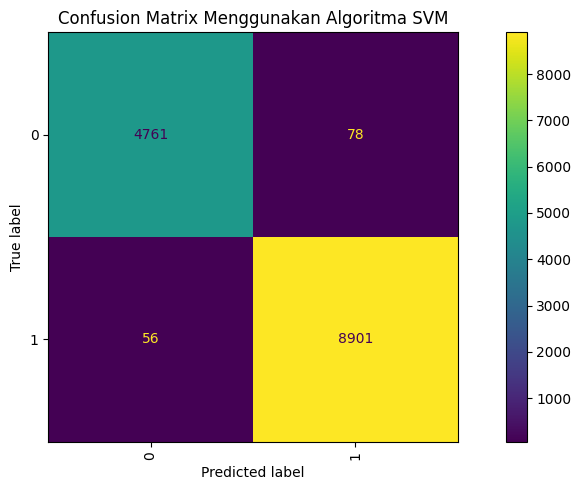

In [40]:
make_evaluation(y_test, y_pred, "Confusion Matrix Menggunakan Algoritma SVM", target_names=["0", "1"])


**Insight:**
- False Positive (78): Sebanyak 78 orang yang sebenarnya tidak berisiko diprediksi berisiko. Ini bisa berdampak ke over-treatment, tapi relatif tidak berbahaya.

- False Negative (56): Sebanyak 56 orang yang sebenarnya berisiko diprediksi tidak berisiko. Ini adalah kesalahan yang lebih serius karena bisa menyebabkan keterlambatan penanganan.

- True Negative (TN): Sebanyak 8901 orang yang
Artinya orang tersebut memang tidak berisiko terkena stroke, dan model benar memprediksi mereka sebagai tidak berisiko.

- True Positive (TP): Sebanyak 4761 orang yang memang berisiko terkena stroke, dan model berhasil mengklasifikasikan mereka dengan benar.

# Evaluasi dan Pemilihan Model

In [41]:
# Membentuk DataFrame berisi model dengan akurasinya
models = pd.DataFrame({
    "Model": ["XGBoost", "Random Forest", "SVM"],
    "Akurasi": [accuracy_xgboost, accuracy_rf, accuracy_svm]
})

# Mengurutkan data berdasarkan akurasi dari tertinggi ke terendah
models.sort_values(by = "Akurasi", ascending = False)

,Model,Akurasi
2,SVM,99.03
0,XGBoost,93.57
1,Random Forest,91.97


**Insight:**

Saya memilih model XGBoost karena proses inferensinya efisien, hasil prediksinya akurat, dan model ini lebih stabil untuk analisis prediktif. Saya menghindari SVM meskipun akurasinya mencapai lebih dari 99%, karena khawatir model tersebut mengalami overfitting.

<ipython-input-42-0ead014bd692>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=models, x="Model", y="Akurasi", palette=custom_palette)


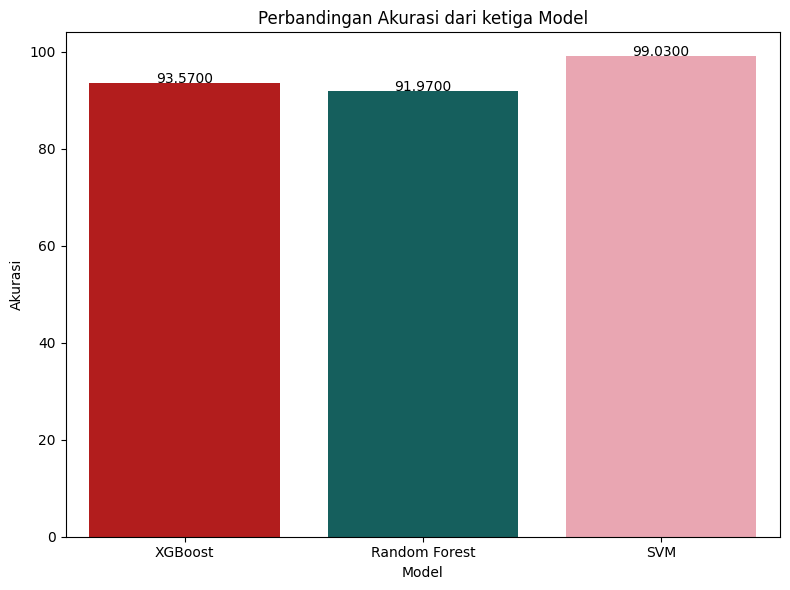

In [42]:
plt.figure(figsize=(8, 6))


custom_palette = ['#CB0404', '#096B68', '#F49BAB']

barplot = sns.barplot(data=models, x="Model", y="Akurasi", palette=custom_palette)

# Menambahkan label angka di atas bar
for index, value in enumerate(models["Akurasi"]):
    barplot.text(index, value + 0.02, f"{value:.4f}", color="black", ha="center")

# Judul dan label
plt.title("Perbandingan Akurasi dari ketiga Model")
plt.xlabel("Model")
plt.ylabel("Akurasi")

plt.tight_layout()
plt.show()


# Menjawab Permasalahan

## 1. Faktor-faktor apa saja yang paling berkontribusi terhadap risiko seseorang mengalami stroke?

<Axes: >

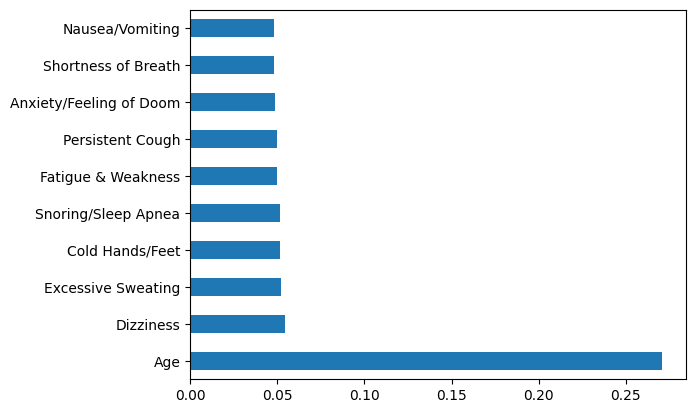

In [49]:
#signifikan faktor dari model XGboost (model Terbaik) tersebut yang menggambarkan responden Terkena cardiovascular
feat_importances = pd.Series(model_xgb.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

**Insight:** Faktor yang paling berkontribusi seseorang mengalami Stroke adalah Faktor Umur(Age)

## 2. Bagaimana model Machine Learning dapat memprediksi apakah seseorang berpotensi terkena stroke berdasarkan kondisi yang mereka input?

In [54]:
import numpy as np

# --- Fungsi Inference ---
def infer_stroke_risk(model):
    print("\nMasukkan data berikut untuk prediksi risiko stroke Anda:\n")

    # Data numerik umum
    age = float(input("Umur (tahun): "))

    # Pertanyaan gejala (biner: 1 = Ya, 0 = Tidak)
    chest_pain = int(input("Apakah Anda mengalami nyeri dada? (1=Ya, 0=Tidak): "))
    short_breath = int(input("Apakah Anda sering sesak napas? (1=Ya, 0=Tidak): "))
    irregular_heartbeat = int(input("Apakah detak jantung Anda tidak teratur? (1=Ya, 0=Tidak): "))
    fatigue = int(input("Apakah Anda sering merasa lelah atau lemas? (1=Ya, 0=Tidak): "))
    dizziness = int(input("Apakah Anda sering merasa pusing? (1=Ya, 0=Tidak): "))
    swelling = int(input("Apakah Anda mengalami pembengkakan (edema)? (1=Ya, 0=Tidak): "))
    pain_upper = int(input("Apakah ada nyeri di leher, rahang, bahu, atau punggung? (1=Ya, 0=Tidak): "))
    sweating = int(input("Apakah Anda berkeringat berlebihan? (1=Ya, 0=Tidak): "))
    cough = int(input("Apakah Anda mengalami batuk terus-menerus? (1=Ya, 0=Tidak): "))
    nausea = int(input("Apakah Anda sering merasa mual atau muntah? (1=Ya, 0=Tidak): "))
    high_bp = int(input("Apakah Anda memiliki tekanan darah tinggi? (1=Ya, 0=Tidak): "))
    chest_discomfort = int(input("Apakah Anda merasa tidak nyaman di dada saat beraktivitas? (1=Ya, 0=Tidak): "))
    cold_extremities = int(input("Apakah tangan atau kaki Anda sering dingin? (1=Ya, 0=Tidak): "))
    apnea = int(input("Apakah Anda mendengkur atau punya sleep apnea? (1=Ya, 0=Tidak): "))
    anxiety = int(input("Apakah Anda merasa cemas berlebihan atau firasat buruk? (1=Ya, 0=Tidak): "))

    # Susun fitur input (urutan sesuai training)
    fitur_input = np.array([[age, chest_pain, short_breath, irregular_heartbeat, fatigue, dizziness,
                             swelling, pain_upper, sweating, cough, nausea,
                             high_bp, chest_discomfort, cold_extremities, apnea, anxiety]])

    # Prediksi
    pred_encoded = model.predict(fitur_input)
    pred_label = "Stroke" if pred_encoded[0] == 1 else "Tidak Stroke"

    print("\n🧠 Prediksi risiko stroke Anda adalah:", pred_label)


# ✅ Panggil inference
infer_stroke_risk(model_xgb)



Masukkan data berikut untuk prediksi risiko stroke Anda:

Umur (tahun): 40
Apakah Anda mengalami nyeri dada? (1=Ya, 0=Tidak): 1
Apakah Anda sering sesak napas? (1=Ya, 0=Tidak): 1
Apakah detak jantung Anda tidak teratur? (1=Ya, 0=Tidak): 0
Apakah Anda sering merasa lelah atau lemas? (1=Ya, 0=Tidak): 1
Apakah Anda sering merasa pusing? (1=Ya, 0=Tidak): 1
Apakah Anda mengalami pembengkakan (edema)? (1=Ya, 0=Tidak): 0
Apakah ada nyeri di leher, rahang, bahu, atau punggung? (1=Ya, 0=Tidak): 1
Apakah Anda berkeringat berlebihan? (1=Ya, 0=Tidak): 1
Apakah Anda mengalami batuk terus-menerus? (1=Ya, 0=Tidak): 1
Apakah Anda sering merasa mual atau muntah? (1=Ya, 0=Tidak): 0
Apakah Anda memiliki tekanan darah tinggi? (1=Ya, 0=Tidak): 1
Apakah Anda merasa tidak nyaman di dada saat beraktivitas? (1=Ya, 0=Tidak): 1
Apakah tangan atau kaki Anda sering dingin? (1=Ya, 0=Tidak): 0
Apakah Anda mendengkur atau punya sleep apnea? (1=Ya, 0=Tidak): 1
Apakah Anda merasa cemas berlebihan atau firasat buruk? (

In [57]:
# ✅ Panggil inference
infer_stroke_risk(model_xgb)


Masukkan data berikut untuk prediksi risiko stroke Anda:

Umur (tahun): 21
Apakah Anda mengalami nyeri dada? (1=Ya, 0=Tidak): 0
Apakah Anda sering sesak napas? (1=Ya, 0=Tidak): 0
Apakah detak jantung Anda tidak teratur? (1=Ya, 0=Tidak): 0
Apakah Anda sering merasa lelah atau lemas? (1=Ya, 0=Tidak): 0
Apakah Anda sering merasa pusing? (1=Ya, 0=Tidak): 1
Apakah Anda mengalami pembengkakan (edema)? (1=Ya, 0=Tidak): 0
Apakah ada nyeri di leher, rahang, bahu, atau punggung? (1=Ya, 0=Tidak): 0
Apakah Anda berkeringat berlebihan? (1=Ya, 0=Tidak): 0
Apakah Anda mengalami batuk terus-menerus? (1=Ya, 0=Tidak): 0
Apakah Anda sering merasa mual atau muntah? (1=Ya, 0=Tidak): 1
Apakah Anda memiliki tekanan darah tinggi? (1=Ya, 0=Tidak): 0
Apakah Anda merasa tidak nyaman di dada saat beraktivitas? (1=Ya, 0=Tidak): 1
Apakah tangan atau kaki Anda sering dingin? (1=Ya, 0=Tidak): 0
Apakah Anda mendengkur atau punya sleep apnea? (1=Ya, 0=Tidak): 1
Apakah Anda merasa cemas berlebihan atau firasat buruk? (